In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score

In [2]:
Dataset_path = 'SMS Spam Collection Dataset/spam.csv'

In [3]:
my_data = pd.read_csv(Dataset_path, encoding='ISO-8859-1')

In [4]:
my_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
column_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [6]:
my_data.drop(columns=column_to_drop, inplace=True)

In [7]:
my_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
my_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
my_data['v1'] = my_data['v1'].map({'ham': 0, 'spam': 1})

In [10]:
# Lowercasing
# Removing punctuation
# Tokenization (split text into words)
# Removing stopwords and applying stemming
# Join the words back into a cleaned text

In [11]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    words = text.split()
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text

In [12]:
my_data['v2'] = my_data['v2'].apply(preprocess_text)

In [13]:
my_data

,v1,v2
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkts 2...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though
...,...,...
5567,1,2nd time tri 2 contact u u å£750 pound prize 2...
5568,0,ì b go esplanad fr home
5569,0,piti mood soani suggest
5570,0,guy bitch act like id interest buy someth els ...


In [14]:
X = my_data['v2']
y = my_data['v1']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [16]:
# Initialize the TF-IDF vectorizer
# Fit and transform the training data
# Transform the test data using the same vectorizer

In [17]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Using Naive Bayes

In [18]:
Naive_Bayes_Classifier = MultinomialNB()

In [19]:
# Let use cross validation to ensure model performs well
val_scores_by_naive_bayes = cross_val_score(Naive_Bayes_Classifier, X_train_tfidf, y_train, cv=10, scoring='accuracy')

In [20]:
Naive_Bayes_Classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
y_pred_by_naive_bayes = Naive_Bayes_Classifier.predict(X_test_tfidf)

# Using Logistic Regression 

In [22]:
Logistic_regression_Classifier = LogisticRegression()

In [23]:
# Let use cross validation to ensure model performs well
val_scores_by_logistic_regression = cross_val_score(Naive_Bayes_Classifier, X_train_tfidf, y_train, cv=10, scoring='accuracy')

In [24]:
Logistic_regression_Classifier.fit(X_train_tfidf, y_train)

LogisticRegression()

In [25]:
y_pred_by_logistic_regression = Logistic_regression_Classifier.predict(X_test_tfidf)

# Using Support Vector Machines (SVM)

In [26]:
Support_Vector_Machines_Classifier = SVC()

In [27]:
# Let use cross validation to ensure model performs well
val_scores_by_SVM = cross_val_score(Support_Vector_Machines_Classifier, X_train_tfidf, y_train, cv=10, scoring='accuracy')

In [28]:
Support_Vector_Machines_Classifier.fit(X_train_tfidf, y_train)

SVC()

In [29]:
y_pred_by_SVM = Support_Vector_Machines_Classifier.predict(X_test_tfidf)

# Results and Discussion

### Confusion Matrix

In [30]:
conf_mat = []
conf_mat.append(confusion_matrix(y_test, y_pred_by_naive_bayes))
conf_mat.append(confusion_matrix(y_test, y_pred_by_logistic_regression))
conf_mat.append(confusion_matrix(y_test, y_pred_by_SVM))

In [31]:
clfs = {
    'Naive Bayes':Naive_Bayes_Classifier,
    'Logistic Regression':Logistic_regression_Classifier,
    'SVM':Support_Vector_Machines_Classifier
}

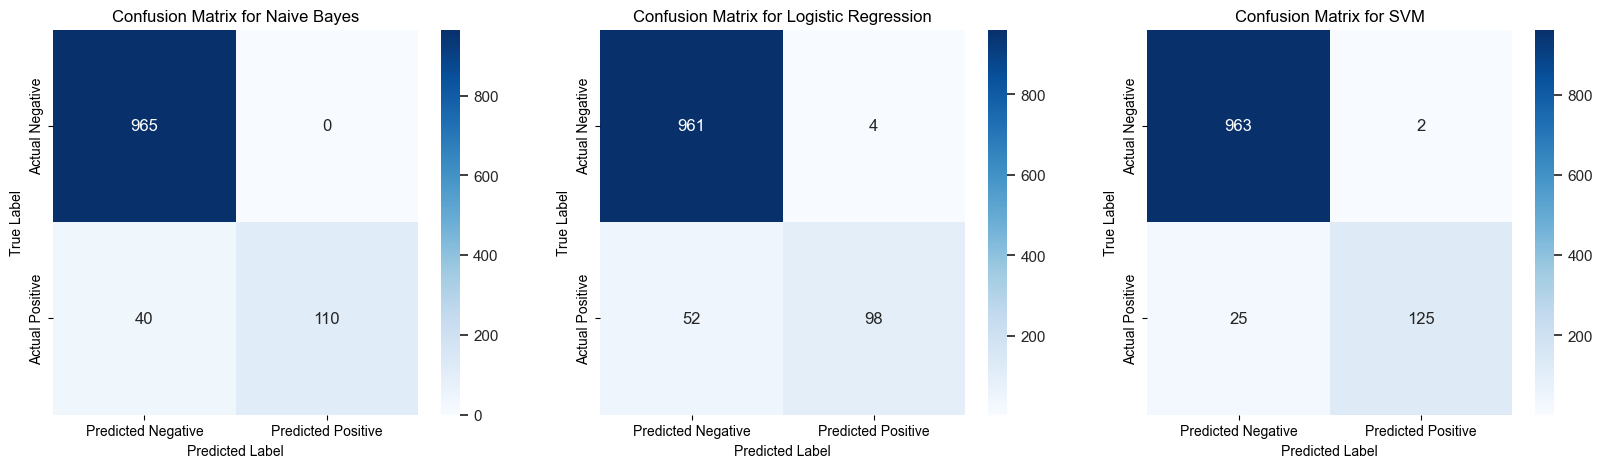

In [32]:
num_classifiers = len(conf_mat)

fig, axes = plt.subplots(1, num_classifiers, figsize=(20, 5))  # Adjusting figsize 

for i, (matrix, classifier) in enumerate(zip(conf_mat, list(clfs.keys()))):
    sns.set(font_scale=1)  # Adjusting the font size 
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"],
                ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {classifier}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

### Accuracy

In [33]:
accuracy_by_naive_bayes = accuracy_score(y_test, y_pred_by_naive_bayes)
accuracy_by_logistic_regression = accuracy_score(y_test, y_pred_by_logistic_regression)
accuracy_by_SVM = accuracy_score(y_test, y_pred_by_SVM)

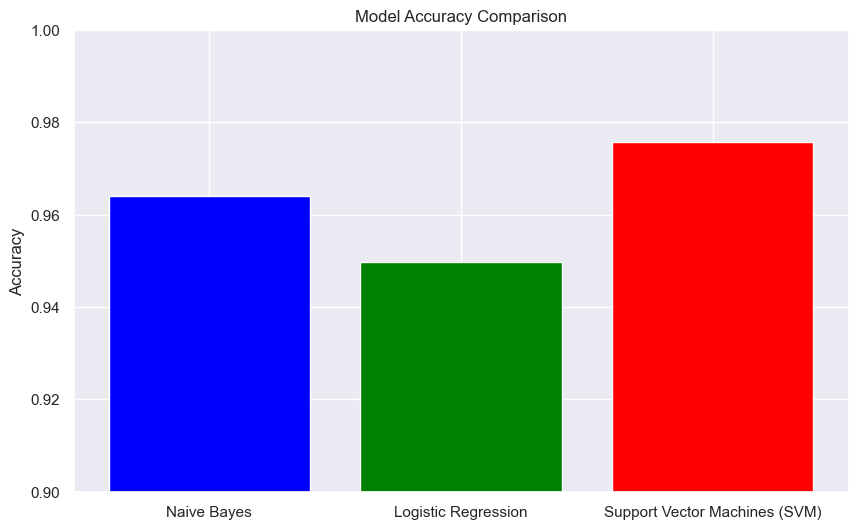

In [34]:
accuracies = [accuracy_score(y_test, y_pred_by_naive_bayes), accuracy_score(y_test, y_pred_by_logistic_regression), accuracy_score(y_test, y_pred_by_SVM)]
model_names = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machines (SVM)']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1])
plt.show()

### ROC Curve

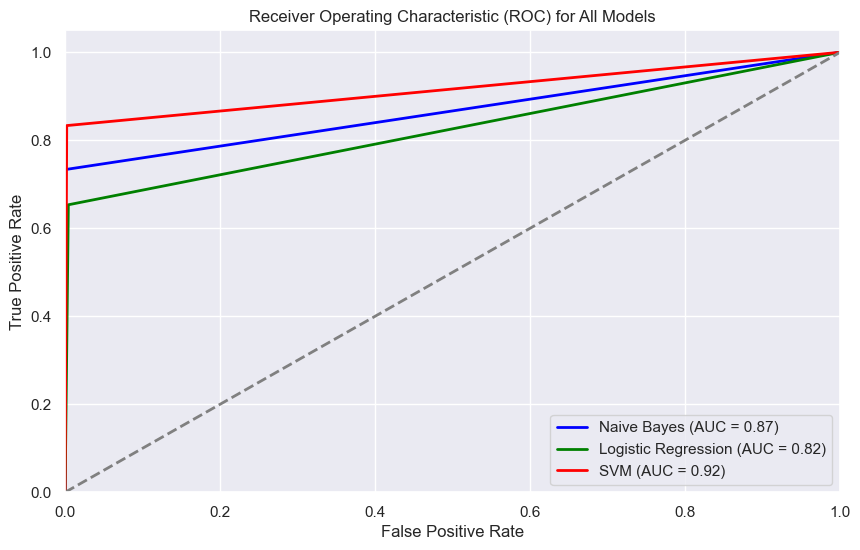

In [35]:
# Calculate ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_by_naive_bayes)
roc_auc_nb = roc_auc_score(y_test, y_pred_by_naive_bayes)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_by_logistic_regression)
roc_auc_lr = roc_auc_score(y_test, y_pred_by_logistic_regression)

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_by_SVM)
roc_auc_svm = roc_auc_score(y_test, y_pred_by_SVM)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for All Models')
plt.legend(loc='lower right')
plt.show()

### Precision and Recall

In [36]:
# Calculate precision and recall for Naive Bayes
precision_nb = precision_score(y_test, y_pred_by_naive_bayes, average=None)
recall_nb = recall_score(y_test, y_pred_by_naive_bayes, average=None)

# Calculate precision and recall for Logistic Regression
precision_lr = precision_score(y_test, y_pred_by_logistic_regression, average=None)
recall_lr = recall_score(y_test, y_pred_by_logistic_regression, average=None)

# Calculate precision and recall for SVM
precision_svm = precision_score(y_test, y_pred_by_SVM, average=None)
recall_svm = recall_score(y_test, y_pred_by_SVM, average=None)

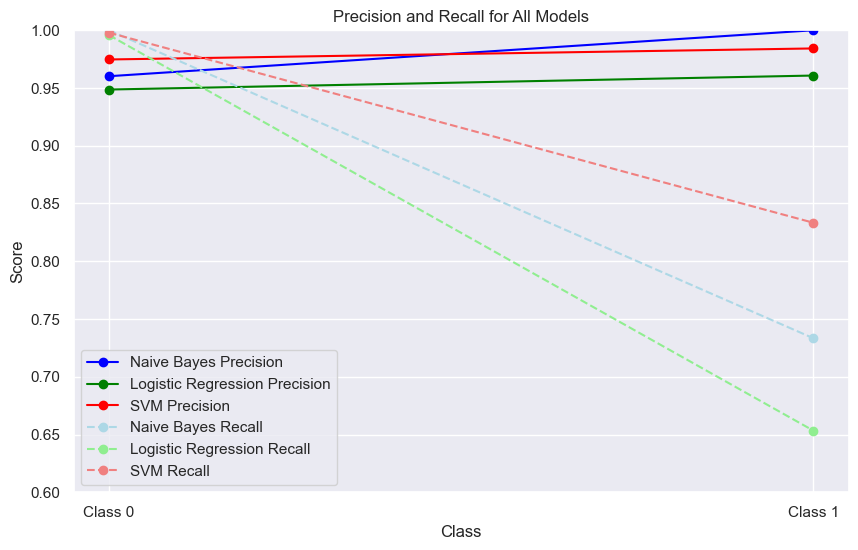

In [37]:
plt.figure(figsize=(10, 6))

plt.plot(['Class 0', 'Class 1'], precision_nb, marker='o', linestyle='-', color='blue', label='Naive Bayes Precision')
plt.plot(['Class 0', 'Class 1'], precision_lr, marker='o', linestyle='-', color='green', label='Logistic Regression Precision')
plt.plot(['Class 0', 'Class 1'], precision_svm, marker='o', linestyle='-', color='red', label='SVM Precision')

plt.plot(['Class 0', 'Class 1'], recall_nb, marker='o', linestyle='--', color='lightblue', label='Naive Bayes Recall')
plt.plot(['Class 0', 'Class 1'], recall_lr, marker='o', linestyle='--', color='lightgreen', label='Logistic Regression Recall')
plt.plot(['Class 0', 'Class 1'], recall_svm, marker='o', linestyle='--', color='lightcoral', label='SVM Recall')

plt.title('Precision and Recall for All Models')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.6, 1)
plt.legend()

plt.show()

# Results To Csv

In [38]:
results_df = pd.DataFrame({
    'Original': y_test, 
    'Naive Bayes': y_pred_by_naive_bayes,
    'Logistic Regression': y_pred_by_logistic_regression,
    'Support Vector Machines (SVM)': y_pred_by_SVM
})

In [39]:
# Saving the DataFrame to a CSV file
results_df.to_csv('predicted_results.csv', index=False)

# Conclusion 

In conclusion, the Support Vector Machine (SVM) model stands out as the optimal choice for SMS message classification. With the highest accuracy and strong precision and recall scores for both spam and legitimate messages. Above results also indicate that confusion matrices and Receiver Operating Characteristic (ROC) curves, offer a more in-depth understanding of the model's performance characteristics. 
Ultimately, the selection of the Support Vector Machine model, based on its superior performance in this evaluation, is a prudent decision in the context of classifying SMS messages, enhancing the precision and efficiency of spam detection while maintaining a high level of overall accuracy.